In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Memuat dataset
df = pd.read_csv("ObesityDataSet.csv")  # Ganti dengan path file Anda

In [5]:
# Menampilkan beberapa baris pertama
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
# Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [7]:
# Menampilkan deskripsi data
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [12]:
df.shape

(2111, 17)

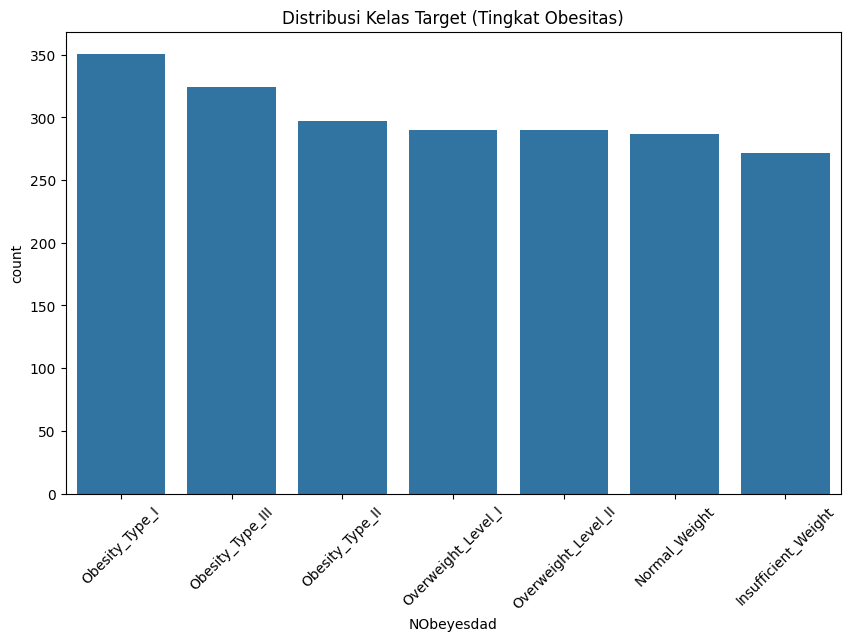

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title("Distribusi Kelas Target (Tingkat Obesitas)")
plt.xticks(rotation=45)
plt.show()

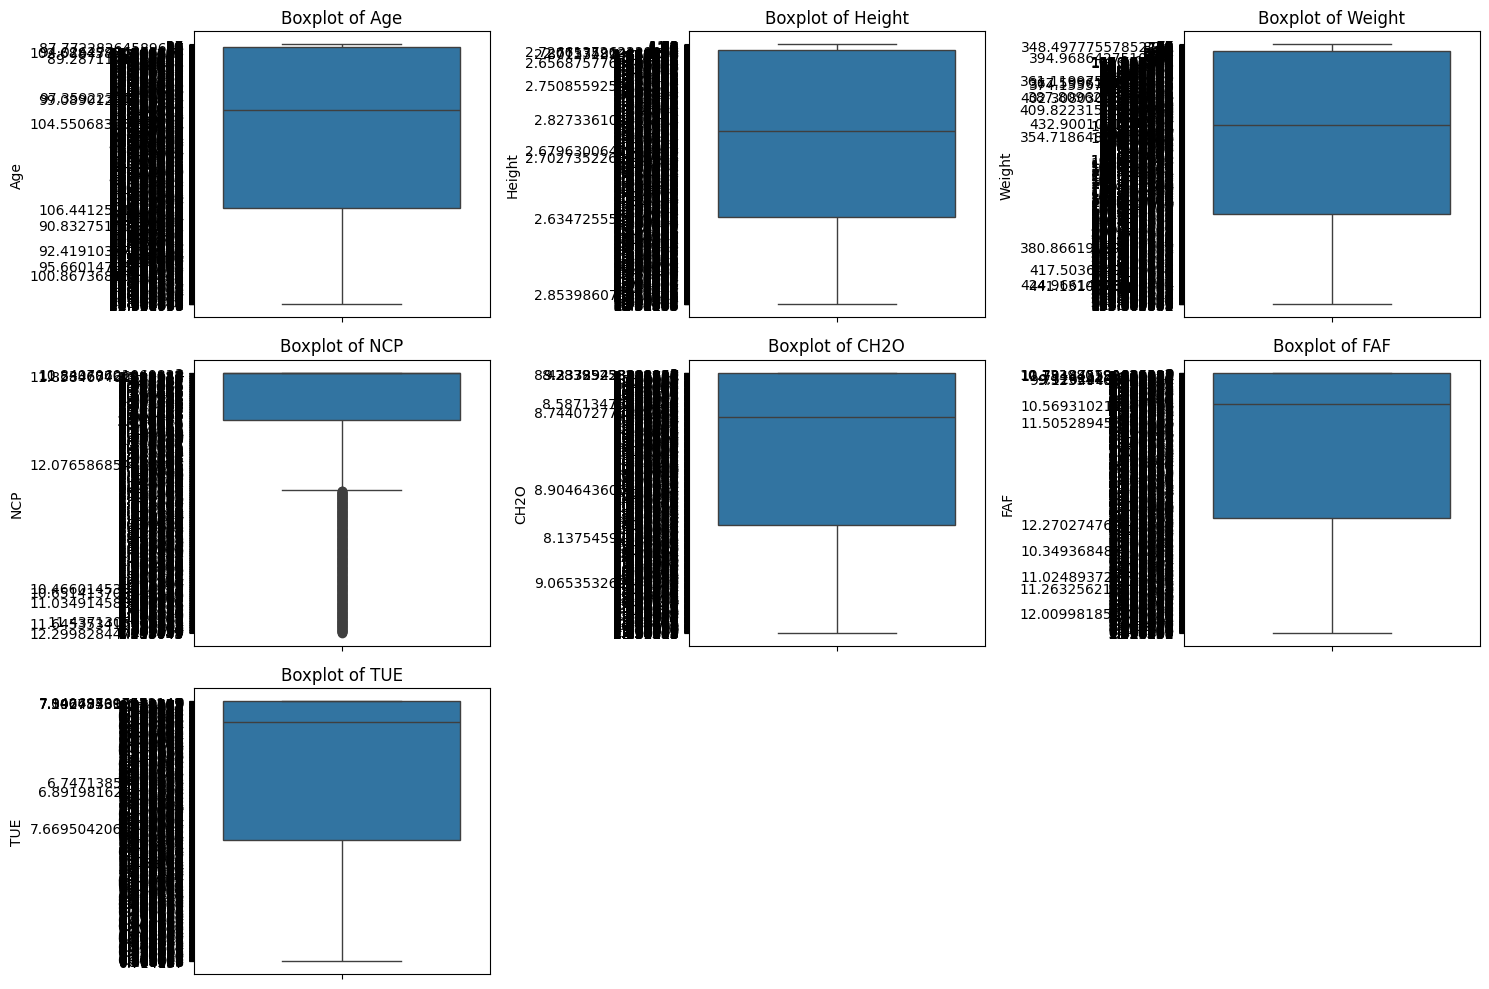

In [15]:
features_cont = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15,10))
for i, col in enumerate(features_cont):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [16]:
# Cek missing values
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [19]:
# Cek duplikasi data
df.duplicated().sum()

np.int64(18)

In [18]:
# Cek nilai unik / unique values
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


## 📊 Kesimpulan Exploratory Data Analysis (EDA)

### 1. Struktur dan Kualitas Data
- Jumlah data: **2111 entri**
- Jumlah fitur: **17 kolom (16 fitur + 1 target)**
- Beberapa kolom numerik seperti `Age`, `Height`, `Weight`, dll., masih dalam tipe **object** → perlu dikonversi ke tipe numerik.
- Terdapat **18 data duplikat**

---

### 2. Missing Values
- Hampir semua kolom memiliki **missing values**, berkisar antara 5–14 nilai per kolom.
- Kolom target (`NObeyesdad`) **tidak memiliki missing value**.

---

### 3. Analisis Boxplot (Distribusi Data Numerik)
- **Age**: Terdapat outlier ekstrem (>180 tahun), kemungkinan kesalahan input.
- **Height & Weight**: Distribusi normal, namun ada nilai ekstrem (e.g., tinggi >2.2m, berat >150kg).
- **NCP (Jumlah makan besar per hari)**: Banyak outlier (lebih dari 10 kali makan per hari).
- **FAF & TUE**: Aktivitas fisik dan penggunaan teknologi menunjukkan variasi tinggi dan outlier.
- **CH2O (konsumsi air)**: Beberapa nilai ekstrem muncul.

---

### 4. Distribusi Target (NObeyesdad)
- Terdiri dari **7 kelas kategori obesitas**:
  - Distribusi relatif seimbang.
  - Kelas terbanyak: `Obesity_Type_I` (~351 data)
  - Kelas tersedikit: `Insufficient_Weight` (~270 data)

---

### 5. Nilai Unik & Tipe Fitur
- Beberapa fitur numerik memiliki ratusan nilai unik (e.g., `CH2O`, `FAF`, `FCVC`, dll.)
- Fitur kategorikal seperti `Gender`, `CALC`, `FAVC`, `MTRANS`, dan `CAEC` memiliki jumlah kategori terbatas dan siap untuk proses encoding.

---
